In [3]:
#import the dependencies

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn import svm 
from sklearn.metrics import accuracy_score

## Data Collection and Preprocessing

In [4]:
car_data = pd.read_csv('car data.csv')

In [6]:
#checking the first 5 rows of our data
car_data.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [7]:
car_data.describe()

,Year,Selling_Price,Present_Price,Kms_Driven,Owner
count,301.000000,301.000000,301.000000,301.000000,301.000000
mean,2013.627907,4.661296,7.628472,36947.205980,0.043189
std,2.891554,5.082812,8.644115,38886.883882,0.247915
min,2003.000000,0.100000,0.320000,500.000000,0.000000
25%,2012.000000,0.900000,1.200000,15000.000000,0.000000
50%,2014.000000,3.600000,6.400000,32000.000000,0.000000
75%,2016.000000,6.000000,9.900000,48767.000000,0.000000
max,2018.000000,35.000000,92.600000,500000.000000,3.000000


In [8]:
car_data.shape

(301, 9)

In [9]:
#information about the data

car_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Kms_Driven     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Seller_Type    301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


In [10]:
#Search for number of missing values
car_data.isnull().sum()

Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Kms_Driven       0
Fuel_Type        0
Seller_Type      0
Transmission     0
Owner            0
dtype: int64

In [11]:
# check the distribution of the fuel_type, seller_type and Transmission columns

print(car_data.Fuel_Type.value_counts())
print(car_data.Seller_Type.value_counts())
print(car_data.Transmission.value_counts())

Fuel_Type
Petrol    239
Diesel     60
CNG         2
Name: count, dtype: int64
Seller_Type
Dealer        195
Individual    106
Name: count, dtype: int64
Transmission
Manual       261
Automatic     40
Name: count, dtype: int64


# encoding categorical Data

In [12]:
# encoding fuel_type column
car_data.replace({'Fuel_Type': {'Petrol':0, 'Diesel': 1, 'CNG': 2 }}, inplace=True)

# encoding Seller_type column
car_data.replace({'Seller_Type': {'Dealer':0, 'Individual': 1}}, inplace=True)

# encoding Transmission column
car_data.replace({'Transmission': {'Manual':0, 'Automatic': 1 }}, inplace=True)

C:\Users\HP\AppData\Local\Temp\ipykernel_16352\155768771.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  car_data.replace({'Fuel_Type': {'Petrol':0, 'Diesel': 1, 'CNG': 2 }}, inplace=True)
C:\Users\HP\AppData\Local\Temp\ipykernel_16352\155768771.py:5: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  car_data.replace({'Seller_Type': {'Dealer':0, 'Individual': 1}}, inplace=True)
C:\Users\HP\AppData\Local\Temp\ipykernel_16352\155768771.py:8: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a futu

In [13]:
car_data.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,0,0,0,0
1,sx4,2013,4.75,9.54,43000,1,0,0,0
2,ciaz,2017,7.25,9.85,6900,0,0,0,0
3,wagon r,2011,2.85,4.15,5200,0,0,0,0
4,swift,2014,4.60,6.87,42450,1,0,0,0


## Splitting The Data

In [15]:
x = car_data.drop(['Car_Name', 'Selling_Price'], axis=1)
y = car_data['Selling_Price']

In [16]:
print(x)

     Year  Present_Price  Kms_Driven  Fuel_Type  Seller_Type  Transmission  \
0    2014           5.59       27000          0            0             0   
1    2013           9.54       43000          1            0             0   
2    2017           9.85        6900          0            0             0   
3    2011           4.15        5200          0            0             0   
4    2014           6.87       42450          1            0             0   
..    ...            ...         ...        ...          ...           ...   
296  2016          11.60       33988          1            0             0   
297  2015           5.90       60000          0            0             0   
298  2009          11.00       87934          0            0             0   
299  2017          12.50        9000          1            0             0   
300  2016           5.90        5464          0            0             0   

     Owner  
0        0  
1        0  
2        0  
3        0 

In [17]:
print(y)

0       3.35
1       4.75
2       7.25
3       2.85
4       4.60
       ...  
296     9.50
297     4.00
298     3.35
299    11.50
300     5.30
Name: Selling_Price, Length: 301, dtype: float64


In [18]:
x_train,x_test,y_train,y_test = train_test_split(x,y, test_size=0.1, random_state=2,)

## Model Training

#### Linear Regression

In [22]:
reg = LinearRegression()

In [24]:
reg.fit(x_train,y_train)

LinearRegression()

##### Model Evaluation

In [25]:
#Prediction on training data 

training_data_prediction = reg.predict(x_train)

In [26]:
# R2 error 

error_score = metrics.r2_score(y_train, training_data_prediction)
error_score

0.8799451660493708

#### Visualization


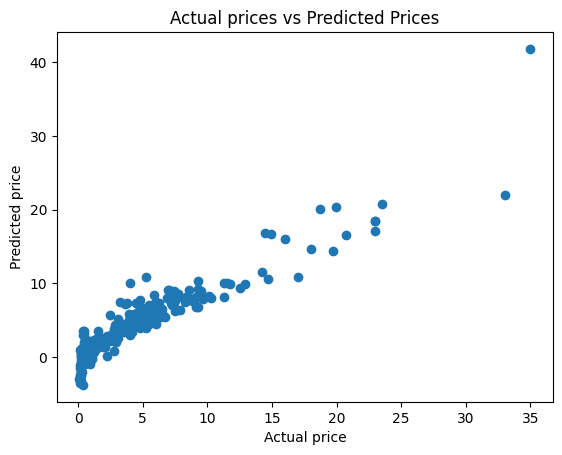

In [28]:
plt.scatter(y_train, training_data_prediction)
plt.xlabel('Actual price')
plt.ylabel('Predicted price')
plt.title('Actual prices vs Predicted Prices')
plt.show()

In [29]:
# prediction on test data


test_data_prediction = reg.predict(x_test)

In [30]:
error_score = metrics.r2_score(y_test, test_data_prediction)
error_score

0.8365766715026374

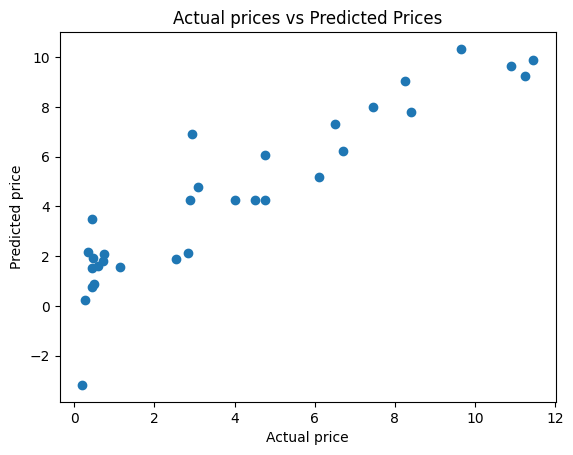

In [31]:
plt.scatter(y_test, test_data_prediction)
plt.xlabel('Actual price')
plt.ylabel('Predicted price')
plt.title('Actual prices vs Predicted Prices')
plt.show()

#### Lasso Regression

In [32]:
lasso_reg = Lasso()

In [33]:
lasso_reg.fit(x_train,y_train)

Lasso()

In [34]:
training_data_prediction = lasso_reg.predict(x_train)

In [35]:
error_score = metrics.r2_score(y_train, training_data_prediction)
error_score

0.8427856123435794

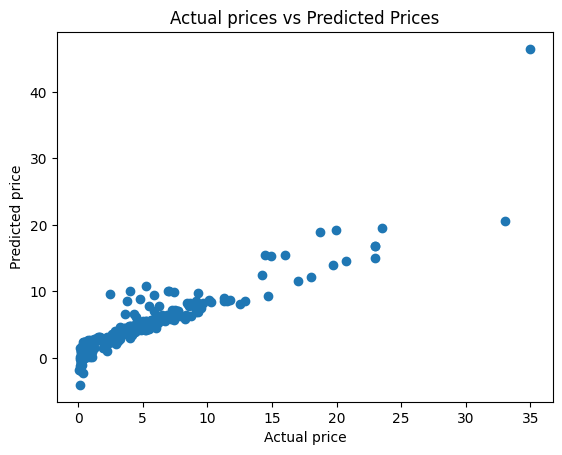

In [36]:
plt.scatter(y_train, training_data_prediction)
plt.xlabel('Actual price')
plt.ylabel('Predicted price')
plt.title('Actual prices vs Predicted Prices')
plt.show()

In [37]:
test_data_prediction = lasso_reg.predict(x_test)

In [38]:
error_score = metrics.r2_score(y_test, test_data_prediction)
error_score

0.8709167941173195

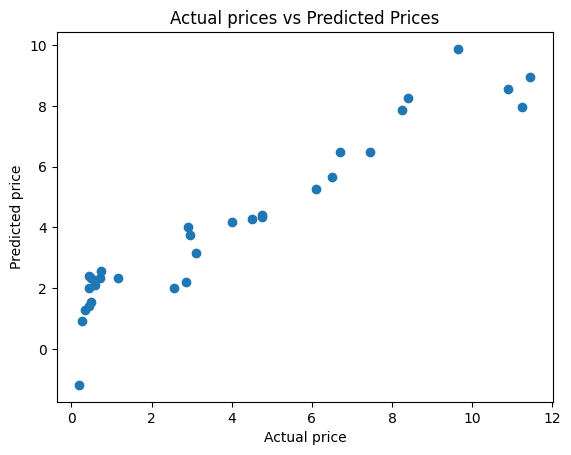

In [39]:
plt.scatter(y_test, test_data_prediction)
plt.xlabel('Actual price')
plt.ylabel('Predicted price')
plt.title('Actual prices vs Predicted Prices')
plt.show()